In [1]:
import warnings

warnings.filterwarnings(action='ignore')

import keras
import numpy as np

keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
print (train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) 
    print(results.shape)
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    
    return results

In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

(25000, 10000)
(25000, 10000)


In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
print(y_train[:10])

[1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]


In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [10]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.1684 - accuracy: 0.7853 - val_loss: 0.1196 - val_accuracy: 0.8702
Epoch 2/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.0901 - accuracy: 0.9044 - val_loss: 0.0911 - val_accuracy: 0.8888
Epoch 3/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.0632 - accuracy: 0.9308 - val_loss: 0.0849 - val_accuracy: 0.8896
Epoch 4/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.0485 - accuracy: 0.9473 - val_loss: 0.0819 - val_accuracy: 0.8911
Epoch 5/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.0396 - accuracy: 0.9592 - val_loss: 0.0872 - val_accuracy: 0.8816
Epoch 6/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.0317 - accuracy: 0.9675 - val_loss: 0.0890 - val_accuracy: 0.8787
Epoch 7/20
15000/15000 [==============================] - 1s 99u

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

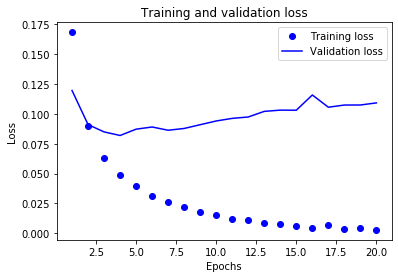

In [15]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

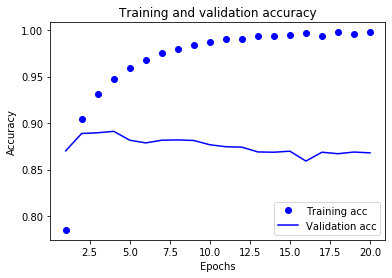

In [16]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:
from keras.utils import to_categorical

partial_y_train = to_categorical(partial_y_train)

In [18]:
y_val = to_categorical(y_val)

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [20]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.4976 - accuracy: 0.7806 - val_loss: 0.3671 - val_accuracy: 0.8715
Epoch 2/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.2882 - accuracy: 0.9059 - val_loss: 0.3048 - val_accuracy: 0.8809
Epoch 3/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.2094 - accuracy: 0.9315 - val_loss: 0.3000 - val_accuracy: 0.8799
Epoch 4/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1594 - accuracy: 0.9485 - val_loss: 0.2763 - val_accuracy: 0.8883
Epoch 5/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.1321 - accuracy: 0.9559 - val_loss: 0.2990 - val_accuracy: 0.8840
Epoch 6/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.1048 - accuracy: 0.9667 - val_loss: 0.3169 - val_accuracy: 0.8834
Epoch 7/20
15000/15000 [==============================] - 2s 1

In [22]:
print(x_test[0])

[0. 1. 1. ... 0. 0. 0.]


In [23]:
result = model.predict(x_test)

In [24]:
result

array([[9.9763775e-01, 2.3622022e-03],
       [7.5288135e-08, 9.9999988e-01],
       [4.6521043e-03, 9.9534792e-01],
       ...,
       [9.9756974e-01, 2.4302953e-03],
       [9.9810249e-01, 1.8975666e-03],
       [4.4781291e-01, 5.5218703e-01]], dtype=float32)